In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [57]:
df=pd.read_excel('covid-nepal.xlsx')

In [58]:
df.shape

(14031, 27)

In [59]:
df.head()

,id,Created On,Modified On,Recovered On,Current State,Death On,District,Province,Districts,Is Reinfected,...,Bbox/2,Bbox/3,Centroid/Coordinates/0,Centroid/Coordinates/1,Municipality,Nationality,point/coordinates/0,point/coordinates/1,Province (District),Ward
0,1,2020-04-08T12:10:46.924551+05:45,2020-04-29T10:23:24.996211+05:45,2020-01-31,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27006,2.0,85.306941,27.695445,3,3716.0
1,2,2020-04-08T12:10:46.924551+05:45,2020-04-18T15:44:15.656734+05:45,2020-04-18,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27006,2.0,85.303927,27.695357,3,3716.0
2,15,2020-04-14T12:59:03.097377+05:45,2020-05-24T16:45:27.983589+05:45,2020-04-23,active,NaT,27,3,Kathmandu,True,...,85.565844,27.817653,85.347351,27.728201,27005,2.0,85.370910,27.692810,3,3837.0
3,16,2020-04-14T12:59:53.539214+05:45,2020-04-23T16:55:04.611254+05:45,2020-04-23,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27005,2.0,85.371457,27.692974,3,3837.0
4,220,2020-05-12T22:38:57.878594+05:45,2020-05-23T13:12:30.865361+05:45,2020-05-21,recovered,NaT,27,3,Kathmandu,False,...,85.565844,27.817653,85.347351,27.728201,27001,NaN,85.356898,27.734822,3,3809.0


In [60]:
df['Created_month']=pd.DatetimeIndex(df['Created On']).month
df['Modified_month']=pd.DatetimeIndex(df['Modified On']).month
df['Recovered_month']=pd.DatetimeIndex(df['Recovered On']).month

In [62]:
df['Recovered_month'].fillna('NA',inplace=True)

In [64]:
def convert(date):
    if type(date)==float:
        return int(date)
    else:
        return 'Na'
        
df['Recovered_month']=df['Recovered_month'].apply(lambda x: convert(x))

In [68]:
df.drop(['Created On','Modified On','Recovered On'],axis=1,inplace=True)

Index(['id', 'Current State', 'Death On', 'District', 'Province', 'Districts',
       'Is Reinfected', 'Gender', 'Reported On', 'Age', 'Source', 'Type',
       'Bbox/0', 'Bbox/1', 'Bbox/2', 'Bbox/3', 'Centroid/Coordinates/0',
       'Centroid/Coordinates/1', 'Municipality', 'Nationality',
       'point/coordinates/0', 'point/coordinates/1', 'Province (District)',
       'Ward', 'Created_month', 'Modified_month', 'Recovered_month'],
      dtype='object')

In [70]:
df.head()

,id,Current State,Death On,District,Province,Districts,Is Reinfected,Gender,Reported On,Age,...,Centroid/Coordinates/1,Municipality,Nationality,point/coordinates/0,point/coordinates/1,Province (District),Ward,Created_month,Modified_month,Recovered_month
0,1,recovered,NaT,27,3,Kathmandu,False,male,2020-01-24,32.0,...,27.728201,27006,2.0,85.306941,27.695445,3,3716.0,4,4,1
1,2,recovered,NaT,27,3,Kathmandu,False,female,2020-03-23,19.0,...,27.728201,27006,2.0,85.303927,27.695357,3,3716.0,4,4,4
2,15,active,NaT,27,3,Kathmandu,True,male,2020-04-14,58.0,...,27.728201,27005,2.0,85.370910,27.692810,3,3837.0,4,5,4
3,16,recovered,NaT,27,3,Kathmandu,False,female,2020-04-14,81.0,...,27.728201,27005,2.0,85.371457,27.692974,3,3837.0,4,4,4
4,220,recovered,NaT,27,3,Kathmandu,False,female,2020-05-12,33.0,...,27.728201,27001,NaN,85.356898,27.734822,3,3809.0,5,5,5


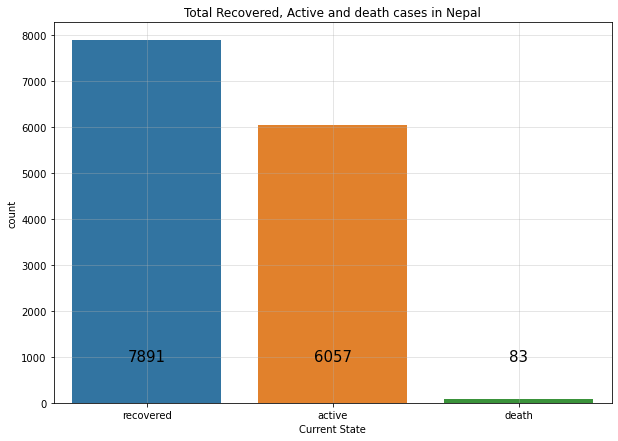

In [92]:
pl.figure(figsize=(10,7))
ax=sns.countplot(df['Current State'])
pl.title('Total Recovered, Active and death cases in Nepal')

for i,j in enumerate(df['Current State'].value_counts().reset_index()['Current State'].values):
    ax.text(i,1000,j,ha='center',va='center',size=15)
pl.grid(alpha=.4)
pl.show()

<IPython.core.display.Javascript object>

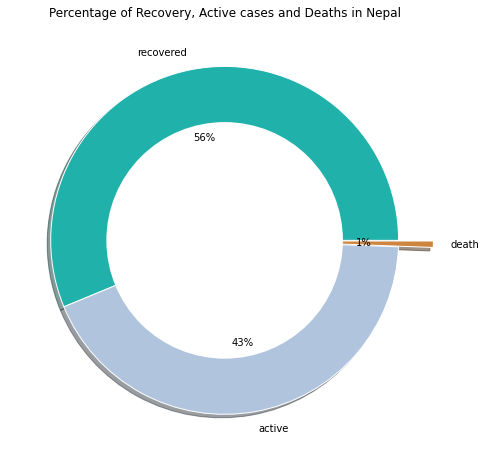

In [146]:
pl.figure(figsize=(10,8))
pl.title('Percentage of Recovery, Active cases and Deaths in Nepal')
pieplot=df['Current State'].value_counts()
pl.pie(pieplot,labels=pieplot.keys(),autopct='%1.0f%%',
       wedgeprops=({'linewidth':1,'edgecolor':'w'}),explode=[0,0,0.2],
       colors=['lightseagreen','lightsteelblue','peru'],shadow=True)
centre_circle = plt.Circle((0,0),0.68,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
pl.show()

In [105]:
pieplot.keys()

Index(['recovered', 'active', 'death'], dtype='object')